Notebook intended to estimate parameters from ICB and SLC 

In [4]:
import os
startup_file = "/Users/octavia/Dropbox/fire/src_v1/startup.py"


In [5]:
run "/Users/octavia/Dropbox/fire/src_v1/startup.py"

## Estimate soil moisture content

In [6]:
# Transition matrix from Gaby
theta = {"conifer": {
                "grass" : 0.19, "conifer" : 0.21,"shrub" :0.22, "meadow" :0.40 },
              "meadow": {
                "grass" : np.nan, "conifer" : 0.25,"shrub" :  np.nan, "meadow" : 0.52 },
              "shrub": {
                "grass" : np.nan, "conifer" : 0.2, "shrub" : 0.2, "meadow" : np.nan },
              "grass": {
                "grass" : 0.21, "conifer" : 0.21, "shrub" : 0.21, "meadow" : np.nan }
     }
# porosity = 0.4

In [7]:
s = 0.21/0.4
s

0.5249999999999999

## Estimate mean biomass

In [8]:
# Convert weighted mean carbon (Mg/ha) to biomass (kg/m2)
print ("conifer = ", 97.13/10/0.47)
print ("shrubs = ", 14.79/10/0.47)
print ("meadow = ", 0.96/10/0.47)
print ("grass = ",  0.36/10/0.47)

# Alternative green canopy understory
# k_l =  5.6/0.47/10 # kg/m2, powers, green canopy understory

conifer =  20.66595744680851
shrubs =  3.146808510638298
meadow =  0.2042553191489362
grass =  0.07659574468085106


In [9]:
import numpy as np
## Estimate r from 
b = 0.9
a = 0.01

def r_of_tau(tau, a,b):
    return - np.log(a*(1-b)/(1-a))/tau

tau_u = 60
r_u = r_of_tau(tau_u, a,b)
print ("conifer : tau={0}, r={1:.3f}".format(tau_u, r_u))


tau_s = 6
r_l = r_of_tau(tau_s, a,b)
print ("shrubs : tau={0}, r={1:.3f}".format(tau_s, r_l))


conifer : tau=60, r=0.115
shrubs : tau=6, r=1.150
10.0


## Estimate mean biomass

In [10]:
import pandas as pd

shrub_conifer = {"k_u" : 20.6, 
                 "k_l" : 3.14,
                 "r_u" : 0.15,
                 "r_l" : 0.45,
             }

class params:
    """    
    """
    def __init__(self, params = {}):
        """
        """
        for k, v in params.items():
             setattr(self, k, v)
                
p = params(shrub_conifer)


## Stability of the lower canopy
Maximum $\alpha$ where lower canopy biomass is stable (without fires)


In [17]:

S = 0.5
beta = 0.5
k_u = 20
r_l = 0.45
max_alpha = r_l*S**beta/k_u

print (max_alpha)

0.015909902576697322


## Schematic comparison of ICB and SLC


Text(0, 0.5, '$G_u$')

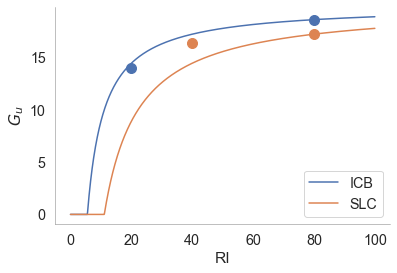

In [16]:
p = RCSR({"S" : 0.5})
RIs = np.arange(0, 100, .1)
G_us = mean_G_u(p.r_u, p.k_u, p.S, p.beta, RIs, p.severity)
line = plt.plot(  RIs,G_us, label = "ICB")

RI_i = 80; 
RI_f = 20;
G_u_i = (mean_G_u(p.r_u, p.k_u, p.S, p.beta, RI_i, p.severity))
plt.plot(RI_i, G_u_i, "o",  c= line[0].get_color(), ms = 10)
plt.plot(RI_f, G_u_i*0.75, "o", c= line[0].get_color(), ms = 10)


##. Update SLC soil moisture
p.S = 0.25

RIs = np.arange(0, 100, .1)
G_us = mean_G_u(p.r_u, p.k_u, p.S, p.beta, RIs, p.severity)
line = plt.plot(  RIs,G_us, label = "SLC")

RI_i = 80; 
RI_f = 40;
G_u_i = (mean_G_u(p.r_u, p.k_u, p.S, p.beta, RI_i, p.severity))
plt.plot(RI_i, G_u_i, "o",  c= line[0].get_color(), ms = 10)
plt.plot(RI_f, G_u_i*0.95, "o", c= line[0].get_color(), ms = 10)


plt.legend(loc = "lower right")
plt.xlabel("RI")
plt.ylabel("$G_u$")

## Understanding poisson

In [9]:
lambDa = 0.05
dt = 1
count = 0
events = []
time_since = 0
waits = []
for i in range(100000):
    if np.random.rand() < lambDa:
        count +=1
        waits.append(time_since + 1)
        time_since = 0
        events.append(1)
        
    else:
        time_since += 1        
        events.append(0)

In [10]:
wait_times = np.diff(np.nonzero(np.random.poisson(lambDa, 100000)))[0] 

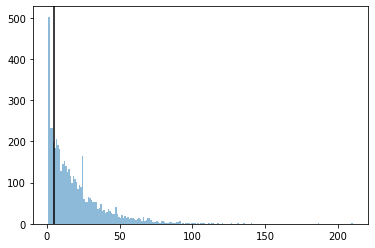

In [11]:
plt.hist(waits, 200, alpha=0.5);
# plt.hist(wait_times, 200);
plt.axvline(5, c= "k")